In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

from pandas import read_csv
import pandas as pd
import datetime as dt
import matplotlib
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt


path1 = '/content/drive/MyDrive/Master_thesis/irradiance.csv'
path2 = '/content/drive/MyDrive/Master_thesis/Gerdata.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
irradiance = read_csv(path1, header =0, index_col=0) 
irradiance.index = pd.to_datetime(irradiance.index, utc=True)

irradiance.index


DatetimeIndex(['2016-02-01 05:00:00+00:00', '2016-02-01 06:00:00+00:00',
               '2016-02-01 07:00:00+00:00', '2016-02-01 08:00:00+00:00',
               '2016-02-01 09:00:00+00:00', '2016-02-01 10:00:00+00:00',
               '2016-02-01 11:00:00+00:00', '2016-02-01 12:00:00+00:00',
               '2016-02-01 13:00:00+00:00', '2016-02-01 14:00:00+00:00',
               ...
               '2018-01-31 10:00:00+00:00', '2018-01-31 11:00:00+00:00',
               '2018-01-31 12:00:00+00:00', '2018-01-31 13:00:00+00:00',
               '2018-01-31 14:00:00+00:00', '2018-01-31 15:00:00+00:00',
               '2018-01-31 16:00:00+00:00', '2018-01-31 17:00:00+00:00',
               '2018-01-31 18:00:00+00:00', '2018-01-31 19:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=10965, freq=None)

In [ ]:
Gerdata = read_csv(path2, header =0, index_col=0) 

Gerdata.index = pd.to_datetime(Gerdata.index, utc=True)

#run only once (the line below)
#Gerdata.index = pd.to_datetime(Gerdata.index).strftime('%d-%m-%Y %H:%m') 

Gerdata.index 


DatetimeIndex(['2016-02-01 05:00:00+00:00', '2016-02-01 06:00:00+00:00',
               '2016-02-01 07:00:00+00:00', '2016-02-01 08:00:00+00:00',
               '2016-02-01 09:00:00+00:00', '2016-02-01 10:00:00+00:00',
               '2016-02-01 11:00:00+00:00', '2016-02-01 12:00:00+00:00',
               '2016-02-01 13:00:00+00:00', '2016-02-01 14:00:00+00:00',
               ...
               '2018-01-31 10:00:00+00:00', '2018-01-31 11:00:00+00:00',
               '2018-01-31 12:00:00+00:00', '2018-01-31 13:00:00+00:00',
               '2018-01-31 14:00:00+00:00', '2018-01-31 15:00:00+00:00',
               '2018-01-31 16:00:00+00:00', '2018-01-31 17:00:00+00:00',
               '2018-01-31 18:00:00+00:00', '2018-01-31 19:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='utc_timestamp', length=10965, freq=None)

In [ ]:
irradiance.head(10)
irradiance.info()
irradiance.describe()
type(irradiance)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10965 entries, 2016-02-01 05:00:00+00:00 to 2018-01-31 19:00:00+00:00
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   local_time         10965 non-null  object 
 1   radiation_surface  10965 non-null  float64
dtypes: float64(1), object(1)
memory usage: 257.0+ KB


pandas.core.frame.DataFrame

In [ ]:
Gerdata.head(10)

Gerdata.info()
Gerdata.describe()

type(Gerdata)

#comments: both datasets have 10965 rows for the same dates and hours. Ready to be merged 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10965 entries, 2016-02-01 05:00:00+00:00 to 2018-01-31 19:00:00+00:00
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cet_cest_timestamp           10965 non-null  object 
 1   DE_KN_industrial1_pv_1       9300 non-null   float64
 2   DE_KN_industrial1_pv_2       9300 non-null   float64
 3   DE_KN_industrial2_pv         5995 non-null   float64
 4   DE_KN_industrial3_pv_facade  7350 non-null   float64
 5   DE_KN_industrial3_pv_roof    7350 non-null   float64
 6   DE_KN_residential1_pv        6090 non-null   float64
 7   DE_KN_residential3_pv        10547 non-null  float64
 8   DE_KN_residential4_pv        10965 non-null  float64
 9   DE_KN_residential6_pv        10965 non-null  float64
 10  Berlin_time                  10965 non-null  object 
 11  Year                         10965 non-null  int64  
 12  Month                      

pandas.core.frame.DataFrame

In [ ]:
df = Gerdata.merge(irradiance, how="outer", left_index=True, right_index=True)

df.head()

,cet_cest_timestamp,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv,Berlin_time,Year,Month,Season,Week,Day,Year_day,Hour,local_time,radiation_surface
utc_timestamp,,,,,,,,,,,,,,,,,,,,
2016-02-01 05:00:00+00:00,2016-02-01T06:00:00+0100,0.00,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 06:00:00+01:00,2016,2,1,5,1,32,6,2016-02-01 06:00,0.000
2016-02-01 06:00:00+00:00,2016-02-01T07:00:00+0100,0.00,0.000,0.000,0.000,0.000,0.000,NaN,0.000,0.000,2016-02-01 07:00:00+01:00,2016,2,1,5,1,32,7,2016-02-01 07:00,0.467
2016-02-01 07:00:00+00:00,2016-02-01T08:00:00+0100,0.00,0.000,0.692,0.067,0.007,0.291,NaN,0.367,0.000,2016-02-01 08:00:00+01:00,2016,2,1,5,1,32,8,2016-02-01 08:00,31.309
2016-02-01 08:00:00+00:00,2016-02-01T09:00:00+0100,0.02,0.000,2.712,0.813,0.063,1.258,NaN,1.628,0.038,2016-02-01 09:00:00+01:00,2016,2,1,5,1,32,9,2016-02-01 09:00,112.503
2016-02-01 09:00:00+00:00,2016-02-01T10:00:00+0100,0.32,0.195,3.113,3.284,0.135,1.677,NaN,1.813,0.607,2016-02-01 10:00:00+01:00,2016,2,1,5,1,32,10,2016-02-01 10:00,208.440


#Visualize relationship between solar power generation and solar irradiance columns

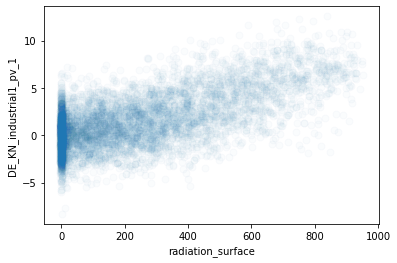

In [ ]:
pv_jitter = df['DE_KN_residential1_pv'] +np.random.normal(0,2,size=len(df))
irra_jitter = df['radiation_surface'] +np.random.normal(0,2,size=len(df))

plt.plot(irra_jitter, pv_jitter, 'o', markersize=7, alpha=0.02)
plt.ylabel("DE_KN_industrial1_pv_1")
plt.xlabel('radiation_surface')
plt.show()

# Removing missing rows where irradiance=0 (one variable at a time)

In [ ]:
cols = ['DE_KN_residential1_pv','radiation_surface']
df2 = df[cols]

df2.head()
print(len(df2))

ir_no_zero = df2['radiation_surface'] !=0
print(ir_no_zero.sum())

df2= df2[ir_no_zero]
print(len(df2))

10965
9098
9098


In [ ]:
print("After removing rows where radiation = 0, ",df2.isna().sum()[0], " missing values are still there. This is ", round(df2.isna().sum()[0] / len(df2) * 100,2),"% of the df2 which looks a lot" )
print("As we can observe, the missing values are at the end of the time series")
df2.tail(100)


# More about missing values 

In [ ]:
print("Missing values by % ","\n","\n",round(df.isnull().sum()/len(df)*100,0))

Missing values by %  
 
 cet_cest_timestamp              0.0
DE_KN_industrial1_pv_1         15.0
DE_KN_industrial1_pv_2         15.0
DE_KN_industrial2_pv           45.0
DE_KN_industrial3_pv_facade    33.0
DE_KN_industrial3_pv_roof      33.0
DE_KN_residential1_pv          44.0
DE_KN_residential3_pv           4.0
DE_KN_residential4_pv           0.0
DE_KN_residential6_pv           0.0
Berlin_time                     0.0
Year                            0.0
Month                           0.0
Season                          0.0
Week                            0.0
Day                             0.0
Year_day                        0.0
Hour                            0.0
local_time                      0.0
radiation_surface               0.0
dtype: float64


#Correlation

In [ ]:
columns = ['radiation_surface']

for col in df.columns:
  if "pv" in col:
    columns.append(col)

subset = df[columns]
subset.corr()

#strong correlation


,radiation_surface,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv
radiation_surface,1.000000,0.861503,0.873364,0.358536,0.790985,0.895143,0.875603,0.915454,0.874520,0.853607
DE_KN_industrial1_pv_1,0.861503,1.000000,0.953871,0.369353,0.814996,0.891245,0.833149,0.915406,0.932913,0.931599
DE_KN_industrial1_pv_2,0.873364,0.953871,1.000000,0.367533,0.785738,0.910626,0.852396,0.934361,0.932206,0.923031
DE_KN_industrial2_pv,0.358536,0.369353,0.367533,1.000000,0.355932,0.380738,0.364588,0.376032,0.395707,0.391522
DE_KN_industrial3_pv_facade,0.790985,0.814996,0.785738,0.355932,1.000000,0.865429,0.860351,0.831383,0.858639,0.851043
DE_KN_industrial3_pv_roof,0.895143,0.891245,0.910626,0.380738,0.865429,1.000000,0.924912,0.954912,0.916421,0.898108
DE_KN_residential1_pv,0.875603,0.833149,0.852396,0.364588,0.860351,0.924912,1.000000,0.923827,0.886422,0.857086
DE_KN_residential3_pv,0.915454,0.915406,0.934361,0.376032,0.831383,0.954912,0.923827,1.000000,0.921109,0.908836
DE_KN_residential4_pv,0.874520,0.932913,0.932206,0.395707,0.858639,0.916421,0.886422,0.921109,1.000000,0.963669
DE_KN_residential6_pv,0.853607,0.931599,0.923031,0.391522,0.851043,0.898108,0.857086,0.908836,0.963669,1.000000


#Standardize & Normalize

In [ ]:

# perform a robust scaler transform of the dataset
# trans = StandardScaler()
# df2 = trans.fit_transform(df)

# scaler = StandardScaler()
# scaler.fit_transform(X_reshaped,[y_reshaped])

# Reahape & split


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df["radiation_surface"]
y = df["DE_KN_residential6_pv"]

print("Shape of X", X.shape)
print("Shape of y", y.shape)

X_reshaped = X.values.reshape(-1,1) 
print("Shape of X", X_reshaped.shape) 

y_reshaped = y.values.reshape(-1,1)
print("Shape of y", y_reshaped.shape)


X_train, X_test, y_train, y_test = train_test_split( X_reshaped, y_reshaped, test_size=0.3, shuffle = False)


Shape of X (10965,)
Shape of y (10965,)
Shape of X (10965, 1)
Shape of y (10965, 1)


# Linear Regression

In [ ]:
from sklearn import metrics
reg = LinearRegression().fit(X_train, y_train)
print("R^2 of Linear Regression on the train set =", reg.score(X_train, y_train))
print("R^2 of Linear Regression on the test set =", reg.score(X_test, y_test))

y_pred = reg.predict(X_test)
print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R^2 of Linear Regression on the train set = 0.6109262743124068
R^2 of Linear Regression on the test set = 0.7235913250697756
MAE: 0.6910135391583985
MSE: 1.0884679260165764
RMSE: 1.0432966625157853


In [ ]:
# for all houses

X = df["radiation_surface"]
X_reshaped = X.values.reshape(-1,1) 

for col in df.columns:
  if "pv" in col:
    y = df[col].fillna(0)
    y_reshaped = y.values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split( X_reshaped, y_reshaped, test_size=0.3, shuffle = False)
    reg = LinearRegression().fit(X_train, y_train)
    print(col)
    print("R^2 of Linear Regression on the train set =", reg.score(X_train, y_train))
    print("R^2 of Linear Regression on the test set =", reg.score(X_test, y_test))

    y_pred = reg.predict(X_test)
    print("MAE:", metrics.mean_absolute_error(y_test,y_pred))
    print("MSE:", metrics.mean_squared_error(y_test,y_pred))
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print()



DE_KN_industrial1_pv_1
R^2 of Linear Regression on the train set = 0.7303477767277216
R^2 of Linear Regression on the test set = 0.7106249670514564
MAE: 0.44751640161095224
MSE: 0.4293053889661769
RMSE: 0.655214002419192

DE_KN_industrial1_pv_2
R^2 of Linear Regression on the train set = 0.759647910756405
R^2 of Linear Regression on the test set = 0.6822229775706473
MAE: 0.3459183774719272
MSE: 0.2510341249015148
RMSE: 0.5010330576933171

DE_KN_industrial2_pv
R^2 of Linear Regression on the train set = 0.07050692582651008
R^2 of Linear Regression on the test set = 0.0
MAE: 2.16342384696102
MSE: 8.880747843647935
RMSE: 2.980058362456671

DE_KN_industrial3_pv_facade
R^2 of Linear Regression on the train set = 0.5270524898585706
R^2 of Linear Regression on the test set = 0.0
MAE: 0.8440866222190125
MSE: 1.5651537013021593
RMSE: 1.2510610302068237

DE_KN_industrial3_pv_roof
R^2 of Linear Regression on the train set = 0.6658662727307901
R^2 of Linear Regression on the test set = 0.0
MAE: 1.

#Ridge regression

In [ ]:
from sklearn.linear_model import Ridge

X = df["radiation_surface"]
X_reshaped = X.values.reshape(-1,1) 

y = df['DE_KN_residential6_pv']fillna(0)
y_reshaped = y.values.reshape(-1,1)

StandardScaler()
ridge = Ridge(alpha=1, fit_intercept=True)
ridge.fit(X_train, y_train)

print("R^2 of Linear Regression on the train set =", ridge.score(X_train, y_train))
print("R^2 of Linear Regression on the test set =", ridge.score(X_test, y_test))

R^2 of Linear Regression on the train set = 0.7280358605649696
R^2 of Linear Regression on the test set = 0.7255042899647246


#Gradient Boosting Regressor 

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state=None, learning_rate=0.09).fit(X_train, y_train)

print("R^2 of Gradient Boosting Regressor on the training set =",GBR.score(X_train, y_train))
print("R^2 of Gradient Boosting Regressor on the test set =",GBR.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2 of Gradient Boosting Regressor on the training set = 0.7478343074173941
R^2 of Gradient Boosting Regressor on the test set = 0.7210955866286123


#Outliers

In [ ]:
# identify outliers with standard deviation method

for col in df.columns:
  if "pv" in col:
    data = df[col]
    # calculate summary statistics
    data_mean, data_std = data.mean(), data.std()
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print(col)
    print("Outliers' values are: ",outliers)
    print("The number of outliers (based on mean and std) = ",len(outliers))
    print("Mean = ",round(data_mean,1), "\n","std =", round(data_std,1), "\n", "lower bound = ", round(lower,1), "\n","upper bound = ",round(upper,1), '\n')


# # remove outliers
# outliers_removed = [x for x in data if x >= lower and x <= upper]
# print('Non-outlier observations: %d' % len(outliers_removed))


DE_KN_industrial1_pv_1
Outliers' values are:  []
The number of outliers (based on mean and std) =  0
Mean =  1.1 
 std = 1.3 
 lower bound =  -2.9 
 upper bound =  5.2 

DE_KN_industrial1_pv_2
Outliers' values are:  [4.160000000000082, 4.019999999999982, 4.170000000000074]
The number of outliers (based on mean and std) =  3
Mean =  0.9 
 std = 1.0 
 lower bound =  -2.2 
 upper bound =  4.0 

DE_KN_industrial2_pv
Outliers' values are:  [666.849000000002]
The number of outliers (based on mean and std) =  1
Mean =  3.4 
 std = 9.4 
 lower bound =  -24.9 
 upper bound =  31.7 

DE_KN_industrial3_pv_facade
Outliers' values are:  [5.8900000000001, 5.566000000000031, 5.754000000000132, 5.564000000000079, 5.634999999999992, 5.855999999999767, 5.882000000000062, 5.73799999999983, 5.75, 5.7000000000000455, 5.774999999999863, 5.732999999999947, 5.943000000000211, 5.941000000000031, 5.6429999999998035, 5.805000000000063, 5.775000000000091, 5.86299999999983, 5.871000000000095, 5.889000000000124, 5.

In [ ]:
# identify outliers with interquartile range (IQR)

from numpy import percentile

for col in df.columns:
  if "pv" in col:
    data = df[col]
    # calculate interquartile range
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    print(col)
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers), "\n")

# !!! most of rows have Nan for quartiles meaning too many Nans

# remove outliers
# outliers_removed = [x for x in data if x >= lower and x <= upper]
# print('Non-outlier observations: %d' % len(outliers_removed))

DE_KN_industrial1_pv_1
Percentiles: 25th=nan, 75th=nan, IQR=nan
Identified outliers: 0 

DE_KN_industrial1_pv_2
Percentiles: 25th=nan, 75th=nan, IQR=nan
Identified outliers: 0 

DE_KN_industrial2_pv
Percentiles: 25th=nan, 75th=nan, IQR=nan
Identified outliers: 0 

DE_KN_industrial3_pv_facade
Percentiles: 25th=nan, 75th=nan, IQR=nan
Identified outliers: 0 

DE_KN_industrial3_pv_roof
Percentiles: 25th=nan, 75th=nan, IQR=nan
Identified outliers: 0 

DE_KN_residential1_pv
Percentiles: 25th=nan, 75th=nan, IQR=nan
Identified outliers: 0 

DE_KN_residential3_pv
Percentiles: 25th=nan, 75th=nan, IQR=nan
Identified outliers: 0 

DE_KN_residential4_pv
Percentiles: 25th=0.055, 75th=3.644, IQR=3.589
Identified outliers: 0 

DE_KN_residential6_pv
Percentiles: 25th=0.000, 75th=2.880, IQR=2.880
Identified outliers: 70 



#Linear Regression after removing outliers

In [ ]:
# Isolation Forest

# evaluate model performance with outliers removed using isolation forest
from sklearn.ensemble import IsolationForest


# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
print(model.score(X_test,y_test))

#almost the same result 

(7675, 1) (7675, 1)
(6907, 1) (6907, 1)
MAE: 0.691
0.7235913250697756


In [ ]:
#Minimum Covariance Determinant

from sklearn.covariance import EllipticEnvelope

# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
print(model.score(X_test,y_test))

(7675, 1) (7675, 1)
(7598, 1) (7598, 1)
MAE: 0.697
0.7254858265711848


In [ ]:
# Local Outlier Factor

from sklearn.neighbors import LocalOutlierFactor

# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)
print(model.score(X_test,y_test))

(7571, 1) (7571, 1)
MAE: 0.698
0.725452468931028
